In [1]:
from fastai.vision import *

In [6]:
path = untar_data(URLs.BIWI_HEAD_POSE)

In [7]:
cal = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6); cal

array([[517.679,   0.   , 320.   ],
       [  0.   , 517.679, 240.5  ],
       [  0.   ,   0.   ,   1.   ]])

In [8]:
fname = '09/frame_00667_rgb.jpg'

In [9]:
def img2txt_name(f): return path/f'{str(f)[:-7]}pose.txt'

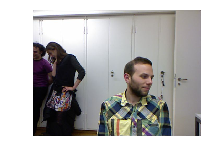

In [10]:
img = open_image(path/fname)
img.show()

In [11]:
ctr = np.genfromtxt(img2txt_name(fname), skip_header=3); ctr

array([187.332 ,  40.3892, 893.135 ])

In [12]:
def convert_biwi(coords):
    c1 = coords[0] * cal[0][0]/coords[2] + cal[0][2]
    c2 = coords[1] * cal[1][1]/coords[2] + cal[1][2]
    return tensor([c2,c1])

def get_ctr(f):
    ctr = np.genfromtxt(img2txt_name(f), skip_header=3)
    return convert_biwi(ctr)

def get_ip(img,pts): return ImagePoints(FlowField(img.size, pts), scale=True)

In [13]:
get_ctr(fname)

tensor([263.9104, 428.5814])

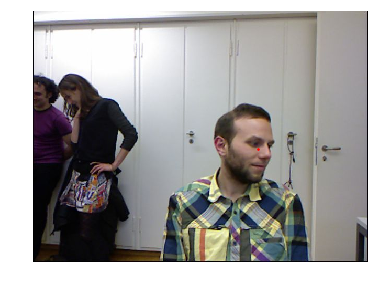

In [14]:
ctr = get_ctr(fname)
img.show(y=get_ip(img, ctr), figsize=(6, 6))

In [15]:
data = (PointsItemList.from_folder(path)
       .split_by_valid_func(lambda o:o.parent.name=='13')
       .label_from_func(get_ctr)
       .transform(get_transforms(), tfm_y=True, size=(120, 160))
       .databunch().normalize(imagenet_stats))

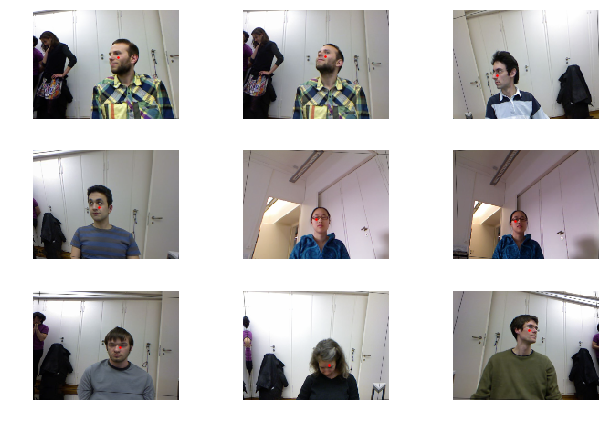

In [17]:
data.show_batch(3, figsize=(9, 6))

In [18]:
learn = cnn_learner(data, models.resnet34)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


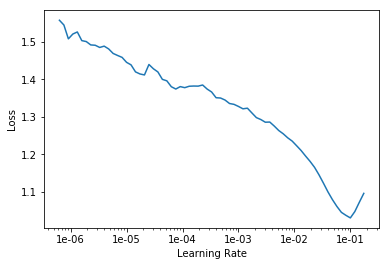

In [20]:
learn.lr_find()
learn.recorder.plot()

In [21]:
lr = 3e-2

In [ ]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,time
0,0.052207,0.025781,01:12
1,0.013917,0.008416,01:14
2,0.007588,0.004112,01:15
3,0.004473,0.001355,01:14


In [ ]:
learn.save('stage-1')

In [ ]:
learn.show_results()